In [1]:
import pandas as pd
import sqlite3
import numpy as np
import random
import datetime
#import matplotlib as plt
from matplotlib import pyplot as plt


In [5]:
kern_200 = [0.000001,0.000001,0.000001,0.000001,0.000001,0.000002,0.000002,0.000002,0.000003,0.000003,0.000004,0.000005,0.000006,0.000007,0.000009,0.00001,0.000012,0.000015,0.000017,0.000021,0.000024,0.000029,0.000034,0.00004,0.000047,0.000054,0.000063,0.000074,0.000086,0.000099,0.000115,0.000133,0.000153,0.000176,0.000202,0.000231,0.000264,0.000301,0.000342,0.000388,0.00044,0.000498,0.000562,0.000632,0.000711,0.000797,0.000892,0.000996,0.00111,0.001235,0.001371,0.001519,0.001679,0.001852,0.002038,0.002239,0.002455,0.002686,0.002932,0.003194,0.003473,0.003769,0.00408,0.004409,0.004754,0.005116,0.005494,0.005888,0.006297,0.00672,0.007157,0.007607,0.008068,0.00854,0.00902,0.009508,0.010002,0.010499,0.010999,0.011498,0.011996,0.012489,0.012975,0.013453,0.013919,0.014372,0.014809,0.015228,0.015626,0.016002,0.016353,0.016677,0.016972,0.017237,0.01747,0.01767,0.017835,0.017964,0.018058,0.018114,0.018132,0.018114,0.018058,0.017964,0.017835,0.01767,0.01747,0.017237,0.016972,0.016677,0.016353,0.016002,0.015626,0.015228,0.014809,0.014372,0.013919,0.013453,0.012975,0.012489,0.011996,0.011498,0.010999,0.010499,0.010002,0.009508,0.00902,0.00854,0.008068,0.007607,0.007157,0.00672,0.006297,0.005888,0.005494,0.005116,0.004754,0.004409,0.00408,0.003769,0.003473,0.003194,0.002932,0.002686,0.002455,0.002239,0.002038,0.001852,0.001679,0.001519,0.001371,0.001235,0.00111,0.000996,0.000892,0.000797,0.000711,0.000632,0.000562,0.000498,0.00044,0.000388,0.000342,0.000301,0.000264,0.000231,0.000202,0.000176,0.000153,0.000133,0.000115,0.000099,0.000086,0.000074,0.000063,0.000054,0.000047,0.00004,0.000034,0.000029,0.000024,0.000021,0.000017,0.000015,0.000012,0.00001,0.000009,0.000007,0.000006,0.000005,0.000004,0.000003,0.000003,0.000002,0.000002,0.000002,0.000001,0.000001,0.000001,0.000001,0.000001]
kern_50 =  [0,0.000001,0.000002,0.000005,0.000012,0.000027,0.00006,0.000125,0.000251,0.000484,0.000898,0.001601,0.002743,0.004514,0.00714,0.010852,0.015849,0.022242,0.029993,0.038866,0.048394,0.057904,0.066574,0.073551,0.078084,0.079656,0.078084,0.073551,0.066574,0.057904,0.048394,0.038866,0.029993,0.022242,0.015849,0.010852,0.00714,0.004514,0.002743,0.001601,0.000898,0.000484,0.000251,0.000125,0.00006,0.000027,0.000012,0.000005,0.000002,0.000001,0]



In [59]:
def custom_kernel(func, kern):
    '''
    Convolution of a function by a kernel.
    Kernel must be odd in length
    Function must be longer than kernel    
    '''
    if len(func) < len(kern):
        return func
    else:
        #midpoint of the kernel
        mid_kern = int((len(kern) + 1)/2)
        
    conv_func = np.zeros(len(func))
    
    for index, value in enumerate(func):
        if index < mid_kern:
            #go from kern[mid_kern] to end for zero
            kern_start = mid_kern - index - 1         
           
            sum = 0.0
            area = 0.0
            for i in range(kern_start, len(kern)):                
                sum += kern[i] * func[index + i - mid_kern]
                #need to correct for the area under the partial kernel being < 1
                area += kern[i]
            conv_func[index] = sum / area
            
        elif index > len(func) - mid_kern:         
            #go from zero to mid_kern + (distance to end of func)
            dist_to_end = len(func) - index + 1
            sum = 0.0
            area = 0.0
            for i in range(0, (mid_kern + dist_to_end -1)):
                sum += kern[i] * func[index + i - mid_kern]
                area += kern[i]
            conv_func[index] = sum / area   
            
        else:
            #sum of kernel * function over window of kernel length centered on func[index]
            sum = 0.0
            for kern_ind, kern_val in enumerate(kern):
                sum += kern_val * func[index + kern_ind - mid_kern]
            conv_func[index] = sum
        
    return conv_func

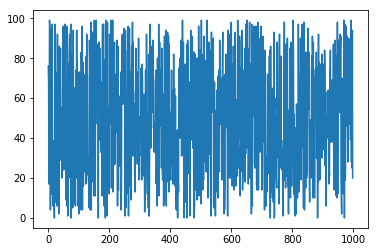

In [61]:
#test with random signal

randoms = []
for i in range(1,1000):
    randoms.append(random.randint(0,99))
    
plt.plot(randoms)
plt.show()




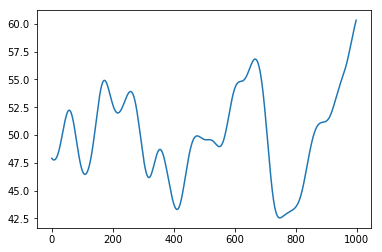

In [63]:
smooth = custom_kernel(randoms, kern_200)

plt.plot(smooth)
plt.show()

In [5]:
#Get the time series and do some stuff with it

sqlite_db = '/home/ian/Data/yahoo.db'
database = sqlite3.connect(sqlite_db)
sql_string = '''SELECT * FROM aav_prices WHERE symbol = 'BNS' UNION ALL SELECT * FROM tsx_prices WHERE symbol = 'BNS';'''

df = pd.read_sql_query(sql_string, database)



In [14]:
df['date_parsed'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
df.sort_values(by = ['date_parsed'], inplace = True, )
df.drop_duplicates(subset = ['date_parsed'], inplace = True)

In [45]:
df['close'] = df['Close'].apply(lambda x: np.NaN if x == 'null' else float(x))
df_valid = df[df['close'] == df['close']]


In [61]:
todays_price = 72.59
today = datetime.datetime.strptime('2019-04-24', '%Y-%m-%d')
yesterday = datetime.datetime.strptime('2019-04-23', '%Y-%m-%d')

diff = today - yesterday

diff.days / 365

def get_return_to_today(row):
    
    elapsed_years = (today - row['date_parsed']).days / 365
    if elapsed_years == 0:
        return 0
    
    price_ratio = todays_price / float(row['Close'])
    annual_return = price_ratio ** (1/elapsed_years)
    return (annual_return - 1) * 100

    


In [62]:
df_valid['return'] = df_valid.apply(get_return_to_today, axis = 1)

/home/ian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
df_valid

,symbol,Date,Open,High,Low,Close,Adj Close,Volume,date_parsed,close,return
145,BNS,1995-01-12,6.187500,6.220000,6.125000,6.157500,1.659382,4813600,1995-01-12,6.1575,10.688110
146,BNS,1995-01-13,6.282500,6.282500,6.125000,6.250000,1.684309,3254400,1995-01-13,6.2500,10.621460
147,BNS,1995-01-16,6.282500,6.407500,6.282500,6.375000,1.717996,5511200,1995-01-16,6.3750,10.535069
148,BNS,1995-01-17,6.345000,6.345000,6.220000,6.282500,1.693068,2941600,1995-01-17,6.2825,10.602873
149,BNS,1995-01-18,6.250000,6.345000,6.220000,6.345000,1.709911,2097200,1995-01-18,6.3450,10.559045
150,BNS,1995-01-19,6.312500,6.345000,6.282500,6.312500,1.701152,1512400,1995-01-19,6.3125,10.583687
151,BNS,1995-01-20,6.282500,6.282500,6.157500,6.187500,1.667466,2400400,1995-01-20,6.1875,10.676097
152,BNS,1995-01-23,6.125000,6.187500,6.062500,6.157500,1.659382,2342000,1995-01-23,6.1575,10.702070
153,BNS,1995-01-24,6.187500,6.282500,6.187500,6.282500,1.693068,1802000,1995-01-24,6.2825,10.611683
154,BNS,1995-01-25,6.250000,6.437500,6.250000,6.345000,1.709911,2879200,1995-01-25,6.3450,10.567818


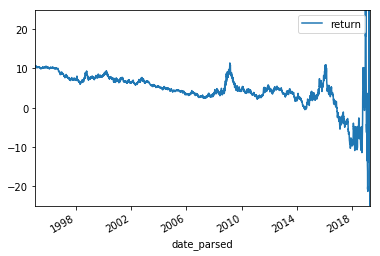

In [64]:
df_valid.plot(x='date_parsed', y='return', ylim = (-25, 25))
plt.show()

In [5]:
sqlite_db2 = '/home/ian/Data/advfn.db'
database2 = sqlite3.connect(sqlite_db2)

sql_string = '''SELECT * FROM quarterly_reports WHERE company_ticker = 'BNS';'''

df_earn = pd.read_sql_query(sql_string, database2)

df_earn['date_parsed'] = df_earn['report_date'].apply(lambda x: datetime.datetime.strptime(x, '%Y/%m'))


In [19]:
df_earn[['date_parsed', 'net income earnings', 'Dividends Paid Per Share (YTD)']]

,date_parsed,net income earnings,Dividends Paid Per Share (YTD)
0,1996-01-01,249,0.08
1,1996-04-01,511,0.16
2,1996-07-01,786,0.24
3,1996-10-01,"1,069.0",0.33
4,1997-01-01,297,0.10
5,1997-04-01,597,0.19
6,1997-07-01,981,0.28
7,1997-10-01,"1,514.0",0.37
8,1998-01-01,331,0.10
9,1998-04-01,677,0.20


In [17]:
for i in df_earn.columns:
    print(i)

company_ticker
report_date
depreciation and amortization
(increase) decrease in inventories
(increase) decrease in other current assets
(increase) decrease in prepaid expenses
(increase) decrease in receivables
% of current ratio-to-industry
% of debt/equity-to-industry
% of earnings-to-industry
% of EPS-to-Industry
% of gross profit margin-to-industry
% of leverage-to-industry
% of net profit margin-to-industry
% of PE-to-Industry
% of post-tax profit margin-to-industry
% of pre-tax profit margin-to-industry
% of pric/free cashlow-to-industry
% of price-to-industry
% of price/book-to-industry
% of price/cashflow-to-industry
% of price/sales-to-industry
% of ROE-to-Industry
% of sales-to-industry
accounts payable
accounts receivable
accrued expenses
accrued interest
accrued interest payables
accrued investment income
accrued liabilities
accrued taxes
accumulated depreciation
acquisitions
additional paid in capital
additional paid-in capital
adjustments to revenue
advertising
allowance 